## 1. Introduction to Diffraction

When light passes through a circular aperture (like a microscope objective), it doesn't form a perfect point image. Instead, it creates a diffraction pattern called an **Airy disk**.

The intensity distribution is described by:

$$I(r) = I_0 \left[\frac{2J_1(x)}{x}\right]^2$$

where:
- $J_1$ is the first-order Bessel function
- $x = \frac{2\pi r \text{NA}}{\lambda}$
- $r$ is the radial distance from the center
- $\text{NA}$ is the numerical aperture
- $\lambda$ is the wavelength of light

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # Bessel function
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 2. The Bessel Function and Its First Zero

The Bessel function $J_1(x)$ is crucial for understanding the Airy disk pattern. Its first zero determines the radius of the central bright disk.

The first zero of $J_1(x)$ occurs at $x \approx 3.8317$.

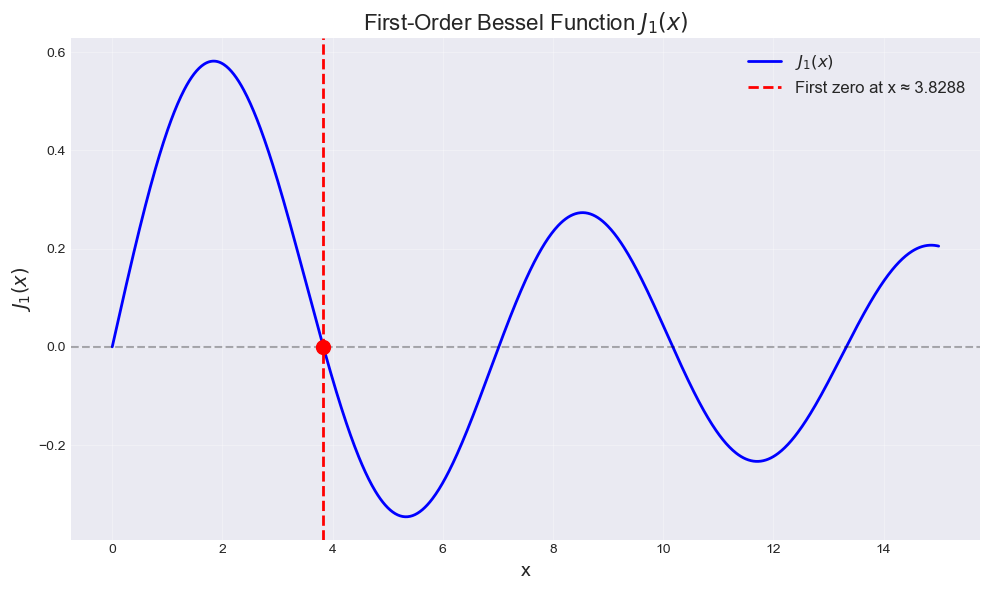

The first zero of J₁(x) occurs at x ≈ 3.8288


In [2]:
# Plot the Bessel function J1(x)
x = np.linspace(0, 15, 1000)
J1 = jv(1, x)

# Find the first non-trivial zero (skip x=0)
# Look for zero crossings after x > 0.1
zero_crossings = np.where(np.diff(np.sign(J1)))[0]
# Filter out the trivial zero at x=0 by taking crossings where x > 1
first_zero_idx = zero_crossings[x[zero_crossings] > 1][0]
first_zero = x[first_zero_idx]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, J1, 'b-', linewidth=2, label='$J_1(x)$')
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax.axvline(x=first_zero, color='r', linestyle='--', linewidth=2, label=f'First zero at x ≈ {first_zero:.4f}')
ax.scatter([first_zero], [0], color='r', s=100, zorder=5)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('$J_1(x)$', fontsize=14)
ax.set_title('First-Order Bessel Function $J_1(x)$', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"The first zero of J₁(x) occurs at x ≈ {first_zero:.4f}")

## 3. The Airy Disk Pattern

The intensity distribution of the Airy disk shows a central bright spot surrounded by concentric rings. The radius to the first minimum (dark ring) defines the size of the central disk.

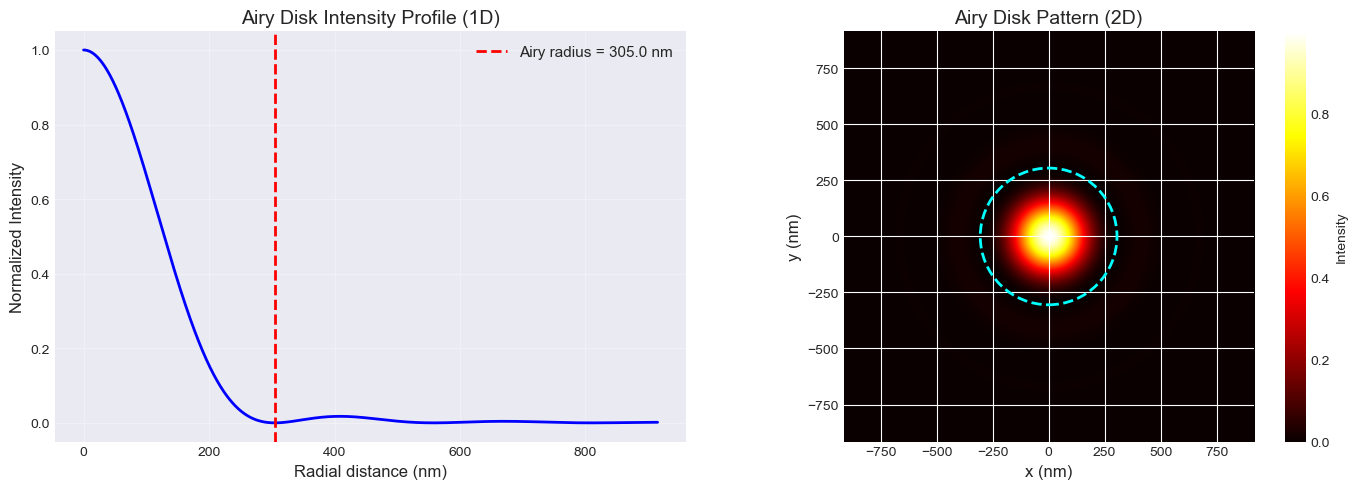

Wavelength: 500 nm
Numerical Aperture: 1.0
Airy disk radius: 305.00 nm


In [5]:
def airy_pattern(r, wavelength=500e-9, NA=1.0):
    """
    Calculate the Airy disk intensity pattern.
    
    Parameters:
    r: radial distance (m)
    wavelength: wavelength of light (m)
    NA: numerical aperture
    
    Returns:
    Normalized intensity
    """
    x = 2 * np.pi * r * NA / wavelength
    # Handle division by zero at r=0
    with np.errstate(divide='ignore', invalid='ignore'):
        intensity = np.where(x == 0, 1.0, (2 * jv(1, x) / x) ** 2)
    return intensity

# Parameters
wavelength = 500e-9  # 500 nm (green light)
NA = 1.0

# Calculate Airy disk radius (to first minimum)
r_airy = 0.61 * wavelength / NA

# Create radial array
r = np.linspace(0, 3 * r_airy, 1000)
intensity = airy_pattern(r, wavelength, NA)

# Plot the intensity profile
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 1D intensity profile
ax1.plot(r * 1e9, intensity, 'b-', linewidth=2)
ax1.axvline(x=r_airy * 1e9, color='r', linestyle='--', linewidth=2, 
            label=f'Airy radius = {r_airy*1e9:.1f} nm')
ax1.set_xlabel('Radial distance (nm)', fontsize=12)
ax1.set_ylabel('Normalized Intensity', fontsize=12)
ax1.set_title('Airy Disk Intensity Profile (1D)', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# 2D Airy disk pattern
x_2d = np.linspace(-3*r_airy, 3*r_airy, 500)
y_2d = np.linspace(-3*r_airy, 3*r_airy, 500)
X, Y = np.meshgrid(x_2d, y_2d)
R = np.sqrt(X**2 + Y**2)
I_2d = airy_pattern(R, wavelength, NA)

im = ax2.imshow(I_2d, extent=[-3*r_airy*1e9, 3*r_airy*1e9, -3*r_airy*1e9, 3*r_airy*1e9],
                cmap='hot', origin='lower')
circle = plt.Circle((0, 0), r_airy*1e9, fill=False, color='cyan', linewidth=2, linestyle='--')
ax2.add_patch(circle)
ax2.set_xlabel('x (nm)', fontsize=12)
ax2.set_ylabel('y (nm)', fontsize=12)
ax2.set_title('Airy Disk Pattern (2D)', fontsize=14)
plt.colorbar(im, ax=ax2, label='Intensity')

plt.tight_layout()
plt.show()

print(f"Wavelength: {wavelength*1e9:.0f} nm")
print(f"Numerical Aperture: {NA}")
print(f"Airy disk radius: {r_airy*1e9:.2f} nm")

## 4. The Rayleigh Criterion

**Lord Rayleigh** proposed that two point sources can be considered resolved when the central maximum of one Airy disk coincides with the first minimum of the other.

The **Rayleigh resolution limit** is given by:

$$d_{\text{Rayleigh}} = \frac{0.61\lambda}{\text{NA}}$$

This comes from the first zero of the Bessel function:
- First zero of $J_1(x)$ occurs at $x \approx 3.8317$
- Setting $x = \frac{2\pi r \text{NA}}{\lambda} = 3.8317$
- Solving for $r$: $r = \frac{3.8317 \lambda}{2\pi \text{NA}} \approx \frac{0.61\lambda}{\text{NA}}$

---
### Derivation Context
This expression comes from analyzing the diffraction pattern formed when light passes through a circular aperture, which is central to understanding optical resolution.

When a plane wave passes through a circular aperture (like a lens), the resulting diffraction pattern in the focal plane is described by **Fraunhofer diffraction**. For a circular aperture, this leads to the **Airy pattern**.

### Variable Definitions
- $\lambda$ = wavelength of light
- $a$ = physical radius of the circular aperture (lens)
- $f$ = focal length of the lens
- $r$ = radial distance in the image plane from the optical axis
- $\theta$ = diffraction angle
- $k = \frac{2\pi}{\lambda}$ = wave number
- $n$ = refractive index of the medium
- $\alpha$ = half-angle of the cone of light collected by the lens
- $\text{NA} = n \sin\alpha$ = numerical aperture
- $x$ = argument of the Bessel function
- $r_1$ = radius to the first minimum (dark ring) of the Airy pattern

### The Mathematical Steps
**1. Starting point:** For a circular aperture of radius $a$, illuminated by light of wavelength $\lambda$, the complex amplitude at a point in the focal plane a distance $r$ from the optical axis is given by a Fourier-type integral over the aperture. Symmetry of the circular aperture converts the integral to a radial form involving a Bessel function.

**2. Geometry:** Relate the image-plane radial coordinate $r$ to the diffraction angle $\theta$:
$$\theta \approx \frac{r}{f} \quad (\text{paraxial / small-angle approximation})$$
where $f$ is the focal length.

**3. Bessel function argument:** The diffraction solution for a circular aperture yields an amplitude proportional to:
$$\frac{2 J_1(x)}{x}, \qquad x = k a \sin\theta$$
with $k = 2\pi/\lambda$ and $a$ the aperture radius.

**4. Connecting to numerical aperture:** The numerical aperture is
$$\text{NA} = n \sin\alpha$$
where $\alpha$ is the marginal (half) angle of the focused cone and $n$ the refractive index of the medium. For a lens of aperture radius $a$ and focal length $f$:
$$\sin\alpha = \frac{a}{f} \; \Rightarrow \; a = f\sin\alpha = \frac{f\,\text{NA}}{n}.$$
For imaging in air ($n \approx 1$), $a/f \approx \text{NA}$.

**5. Substitution to express $x$ in image-plane coordinates:**
$$x = k a \sin\theta = \frac{2\pi}{\lambda} \cdot a \cdot \frac{r}{f} = \frac{2\pi}{\lambda} \cdot \frac{f\,\text{NA}}{n} \cdot \frac{r}{f} = \frac{2\pi r\, \text{NA}}{n\,\lambda}.$$
For air ($n=1$):
$$x = \frac{2\pi r \text{NA}}{\lambda}.$$

**6. First zero condition:** The first minimum (dark ring) of the Airy pattern occurs where $J_1(x)=0$ at $x \approx 3.8317$:
$$3.8317 = \frac{2\pi r_1 \text{NA}}{\lambda} \; \Rightarrow \; r_1 = \frac{3.8317\lambda}{2\pi\text{NA}} \approx \frac{0.61\lambda}{\text{NA}}.$$
This radius $r_1$ is the distance from the center to the first dark ring in the diffraction pattern.

**7. Rayleigh criterion for two point sources:** Two equally bright point sources are "just resolved" when the center of one Airy disk lies at the first minimum of the other (separation = $r_1$). Hence the Rayleigh resolution limit:
$$d_{\text{Rayleigh}} = r_1 \approx \frac{0.61\lambda}{\text{NA}}.$$

This derivation links the geometry of the aperture, the Fourier nature of diffraction, and the properties of the Bessel function to the practical resolution limit in optical systems.

In [ ]:
def plot_rayleigh_criterion(separation, wavelength=500e-9, NA=1.0):
    """
    Plot two Airy disks separated by a given distance to illustrate the Rayleigh criterion.
    """
    r_airy = 0.61 * wavelength / NA
    
    # Create radial array
    r = np.linspace(-3*r_airy, 3*r_airy, 1000)
    
    # Two point sources separated by 'separation'
    r1 = r + separation/2
    r2 = r - separation/2
    
    I1 = airy_pattern(np.abs(r1), wavelength, NA)
    I2 = airy_pattern(np.abs(r2), wavelength, NA)
    I_total = I1 + I2
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(r*1e9, I1, 'r--', linewidth=1.5, alpha=0.6, label='Source 1')
    ax.plot(r*1e9, I2, 'b--', linewidth=1.5, alpha=0.6, label='Source 2')
    ax.plot(r*1e9, I_total, 'k-', linewidth=2.5, label='Combined')
    
    # Calculate dip in the middle
    mid_idx = len(r) // 2
    dip_ratio = I_total[mid_idx] / np.max(I_total)
    
    ax.axvline(x=0, color='gray', linestyle=':', alpha=0.5)
    ax.set_xlabel('Position (nm)', fontsize=12)
    ax.set_ylabel('Normalized Intensity', fontsize=12)
    
    # Determine if resolved
    rayleigh_limit = 0.61 * wavelength / NA
    if separation < 0.8 * rayleigh_limit:
        status = "NOT RESOLVED (too close)"
        color = 'red'
    elif separation > 1.2 * rayleigh_limit:
        status = "WELL RESOLVED"
        color = 'green'
    else:
        status = "RAYLEIGH CRITERION (just resolved)"
        color = 'orange'
    
    title = f'Two Point Sources: Separation = {separation*1e9:.1f} nm\n'
    title += f'Rayleigh Limit = {rayleigh_limit*1e9:.1f} nm | Status: {status} | Dip: {dip_ratio:.2f}'
    ax.set_title(title, fontsize=13, color=color, weight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Example: Plot at different separations
wavelength = 500e-9
NA = 1.0
rayleigh_limit = 0.61 * wavelength / NA

print("=" * 60)
print("Demonstrating the Rayleigh Criterion")
print("=" * 60)
print(f"Rayleigh limit for λ={wavelength*1e9:.0f} nm, NA={NA}: {rayleigh_limit*1e9:.2f} nm\n")

print("Case 1: Separation < Rayleigh limit (NOT RESOLVED)")
plot_rayleigh_criterion(0.5 * rayleigh_limit, wavelength, NA)

print("\nCase 2: Separation = Rayleigh limit (JUST RESOLVED)")
plot_rayleigh_criterion(rayleigh_limit, wavelength, NA)

print("\nCase 3: Separation > Rayleigh limit (WELL RESOLVED)")
plot_rayleigh_criterion(1.5 * rayleigh_limit, wavelength, NA)

## 5. The Abbe Diffraction Limit

**Ernst Abbe** derived a similar expression for the resolution limit:

$$d_{\text{Abbe}} = \frac{\lambda}{2\text{NA}}$$

This is slightly different from the Rayleigh criterion (0.61 vs 0.5) but both express the same fundamental principle:

**Resolution improves with:**
- Shorter wavelength ($\lambda$)
- Higher numerical aperture (NA)

The numerical aperture is defined as:
$$\text{NA} = n \sin(\alpha)$$

where $n$ is the refractive index of the medium and $\alpha$ is the half-angle of the cone of light entering the objective.

## 6. Interactive Exploration: Effect of Numerical Aperture

Use the slider below to see how changing the numerical aperture affects the resolution. Higher NA leads to:
- Smaller Airy disk
- Better resolution
- Ability to distinguish closer point sources

In [ ]:
from IPython.display import display, HTML, clear_output
from ipywidgets import interactive

# Make slider handles and tracks larger for better usability
_display_css = HTML(
    """
    <style>
    /* ipywidgets v7 (ui-slider) */
    .widget-slider .ui-slider { height: 10px; }
    .widget-slider .ui-slider-handle {
        width: 22px; height: 22px; margin-top: -9px; border-radius: 50%;
        border: 2px solid #444; background: #1f77b4;
    }
    /* ipywidgets v8 (noUi) */
    .noUi-target { height: 10px !important; }
    .noUi-handle { width: 22px !important; height: 22px !important; border: 2px solid #444; }
    /* Labels and readouts */
    .widget-label, .widget-readout { font-size: 14px !important; }
    </style>
    """
)
_ = display(_display_css)

def render_resolution_plot(NA=1.0, wavelength_nm=500.0, separation_nm=300.0):
    """
    Render resolution plots given NA, wavelength (nm), and physical separation (nm).
    """
    # Close all existing figures to prevent accumulation
    plt.close('all')
    
    wavelength = wavelength_nm * 1e-9
    separation = separation_nm * 1e-9

    # Calculate resolution limits
    rayleigh_limit = 0.61 * wavelength / NA
    abbe_limit = wavelength / (2 * NA)
    separation_factor = separation / rayleigh_limit

    # Create figure with subplots (dedicated colorbar column for alignment)
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.4, width_ratios=[1, 1, 0.05])

    # 1. Single Airy disk profile
    ax1 = fig.add_subplot(gs[0, 0])
    r = np.linspace(0, 4*rayleigh_limit, 1000)
    intensity = airy_pattern(r, wavelength, NA)
    ax1.plot(r*1e9, intensity, 'b-', linewidth=2)
    ax1.axvline(x=rayleigh_limit*1e9, color='r', linestyle='--', linewidth=2,
                label=f'Rayleigh: {rayleigh_limit*1e9:.1f} nm')
    ax1.axvline(x=abbe_limit*1e9, color='g', linestyle='--', linewidth=2,
                label=f'Abbe: {abbe_limit*1e9:.1f} nm')
    ax1.set_xlabel('Radial distance (nm)', fontsize=11)
    ax1.set_ylabel('Intensity', fontsize=11)
    ax1.set_title(f'Single Airy Disk (NA={NA:.2f})', fontsize=12, weight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # 2. 2D Airy disk
    ax2 = fig.add_subplot(gs[0, 1])
    x_2d = np.linspace(-3*rayleigh_limit, 3*rayleigh_limit, 300)
    y_2d = np.linspace(-3*rayleigh_limit, 3*rayleigh_limit, 300)
    X, Y = np.meshgrid(x_2d, y_2d)
    R = np.sqrt(X**2 + Y**2)
    I_2d = airy_pattern(R, wavelength, NA)
    im = ax2.imshow(I_2d, extent=[-3*rayleigh_limit*1e9, 3*rayleigh_limit*1e9,
                                   -3*rayleigh_limit*1e9, 3*rayleigh_limit*1e9],
                    cmap='hot', origin='lower')
    circle = plt.Circle((0, 0), rayleigh_limit*1e9, fill=False, color='cyan',
                        linewidth=2, linestyle='--', label='Rayleigh radius')
    ax2.add_patch(circle)
    ax2.set_xlabel('x (nm)', fontsize=11)
    ax2.set_ylabel('y (nm)', fontsize=11)
    ax2.set_title('2D Airy Pattern', fontsize=12, weight='bold')

    # Colorbar for 2D Airy disk
    cax1 = fig.add_subplot(gs[0, 2])
    plt.colorbar(im, cax=cax1, label='Intensity')

    # 3. Two point sources - 1D profile
    ax3 = fig.add_subplot(gs[1, 0:2])
    r_range = np.linspace(-4*rayleigh_limit, 4*rayleigh_limit, 1000)
    r1 = r_range + separation/2
    r2 = r_range - separation/2
    I1 = airy_pattern(np.abs(r1), wavelength, NA)
    I2 = airy_pattern(np.abs(r2), wavelength, NA)
    I_total = I1 + I2

    ax3.plot(r_range*1e9, I1, 'r--', linewidth=1.5, alpha=0.5, label='Source 1')
    ax3.plot(r_range*1e9, I2, 'b--', linewidth=1.5, alpha=0.5, label='Source 2')
    ax3.plot(r_range*1e9, I_total, 'k-', linewidth=2.5, label='Combined')
    ax3.axvline(x=0, color='gray', linestyle=':', alpha=0.5)

    # Calculate central dip ratio
    mid_idx = len(r_range) // 2
    dip_ratio = I_total[mid_idx] / np.max(I_total)

    # Rayleigh criterion: binary classification
    if separation_factor < 1.0:
        status = "NOT RESOLVED (below Rayleigh criterion)"
        color = 'red'
    elif np.isclose(separation_factor, 1.0, rtol=1e-3, atol=1e-6):
        status = "RAYLEIGH CRITERION (just resolved)"
        color = 'orange'
    else:
        status = "RESOLVED (above Rayleigh criterion)"
        color = 'green'

    ax3.set_xlabel('Position (nm)', fontsize=11)
    ax3.set_ylabel('Intensity', fontsize=11)
    title = (
        f'Two Point Sources | Separation: {separation_nm:.1f} nm ({separation_factor:.2f}×Rayleigh)\n'
        f'Status: {status} | Central dip: {dip_ratio:.3f} ({(1-dip_ratio)*100:.1f}% drop)'
    )
    ax3.set_title(title, fontsize=12, weight='bold', color=color)
    ax3.legend(fontsize=10)
    ax3.grid(True, alpha=0.3)

    # 4. 2D image of two point sources - aligned with ax3
    ax4 = fig.add_subplot(gs[2, 0:2])
    x_2d = np.linspace(-4*rayleigh_limit, 4*rayleigh_limit, 400)
    y_2d = np.linspace(-3*rayleigh_limit, 3*rayleigh_limit, 300)
    X, Y = np.meshgrid(x_2d, y_2d)
    R1 = np.sqrt((X - separation/2)**2 + Y**2)
    R2 = np.sqrt((X + separation/2)**2 + Y**2)
    I_2d_1 = airy_pattern(R1, wavelength, NA)
    I_2d_2 = airy_pattern(R2, wavelength, NA)
    I_2d_total = I_2d_1 + I_2d_2

    im2 = ax4.imshow(I_2d_total, extent=[-4*rayleigh_limit*1e9, 4*rayleigh_limit*1e9,
                                         -3*rayleigh_limit*1e9, 3*rayleigh_limit*1e9],
                     cmap='hot', origin='lower', aspect='auto')
    ax4.axvline(x=separation/2*1e9, color='cyan', linestyle='--', linewidth=1.5, alpha=0.7)
    ax4.axvline(x=-separation/2*1e9, color='cyan', linestyle='--', linewidth=1.5, alpha=0.7)
    ax4.set_xlabel('x (nm)', fontsize=11)
    ax4.set_ylabel('y (nm)', fontsize=11)
    ax4.set_title('2D Image of Two Point Sources', fontsize=12, weight='bold')

    # Colorbar for 2D two-point image - in dedicated column
    cax2 = fig.add_subplot(gs[2, 2])
    plt.colorbar(im2, cax=cax2, label='Intensity')

    plt.suptitle(
        f'Resolution Analysis: λ={wavelength_nm:.0f} nm, NA={NA:.2f}\n'
        f'Rayleigh Limit = {rayleigh_limit*1e9:.2f} nm | Abbe Limit = {abbe_limit*1e9:.2f} nm',
        fontsize=14, weight='bold', y=0.995
    )
    
    clear_output(wait=True)
    plt.show()

# Simple UI: three sliders only
common_layout = widgets.Layout(width='520px', height='40px')
label_width = '190px'

# Create sliders
separation_slider = FloatSlider(
    min=50.0, max=800.0, step=10.0, value=275.0,
    description='Source separation (nm):',
    continuous_update=False,
    layout=common_layout
)

na_slider = FloatSlider(
    min=0.1, max=1.4, step=0.05, value=1.0,
    description='Numerical Aperture:',
    continuous_update=False,
    layout=common_layout
)

wavelength_slider = FloatSlider(
    min=400, max=700, step=10, value=500,
    description='Wavelength (nm):',
    continuous_update=False,
    layout=common_layout
)

# Style the sliders
for slider in (separation_slider, na_slider, wavelength_slider):
    slider.style.description_width = label_width
    try:
        slider.style.handle_color = '#1f77b4'
    except Exception:
        pass

# Create interactive widget - this handles everything in one place
interact(render_resolution_plot,
         NA=na_slider,
         wavelength_nm=wavelength_slider,
         separation_nm=separation_slider)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Numerical Aperture:', layou…

<function __main__.render_resolution_plot(NA=1.0, wavelength_nm=500.0, separation_nm=300.0)>

## 7. Key Takeaways

1. **Diffraction is fundamental**: When light passes through a circular aperture, it creates an Airy disk pattern, not a perfect point.

2. **The Bessel function $J_1(x)$ governs the pattern**: Its first zero at $x \approx 3.8317$ determines the Airy disk radius.

3. **Rayleigh criterion**: Two points are just resolved when separated by:
   $$d_{\text{Rayleigh}} = \frac{0.61\lambda}{\text{NA}}$$

4. **Abbe limit**: A similar expression:
   $$d_{\text{Abbe}} = \frac{\lambda}{2\text{NA}}$$

5. **Numerical aperture (NA) is crucial**: 
   - Higher NA → smaller Airy disk → better resolution
   - NA = $n \sin(\alpha)$ where $n$ is refractive index and $\alpha$ is the collection angle
   - Maximum NA ≈ 1.4 for oil immersion objectives (n ≈ 1.5)

6. **Practical implications**:
   - Using shorter wavelengths (UV, blue) improves resolution
   - High-NA objectives are essential for microscopy
   - These limits are fundamental and cannot be overcome by conventional optics
   - Super-resolution techniques (STED, PALM, STORM) bypass these limits through clever physics!

## 8. Exercise: Calculate Resolution for Different Systems

Use the cell below to calculate the resolution limit for various optical systems.

In [ ]:
# Define a function to calculate resolution limits
def calculate_resolution(wavelength_nm, NA):
    """
    Calculate Rayleigh and Abbe resolution limits.
    """
    wavelength = wavelength_nm * 1e-9
    rayleigh = 0.61 * wavelength / NA
    abbe = wavelength / (2 * NA)
    
    print(f"\n{'='*50}")
    print(f"Wavelength: {wavelength_nm} nm")
    print(f"Numerical Aperture: {NA}")
    print(f"{'-'*50}")
    print(f"Rayleigh limit: {rayleigh*1e9:.2f} nm")
    print(f"Abbe limit:     {abbe*1e9:.2f} nm")
    print(f"{'='*50}")
    
    return rayleigh, abbe

# Example calculations
print("OPTICAL MICROSCOPY EXAMPLES")
print("\n1. Low-magnification objective (air)")
calculate_resolution(wavelength_nm=550, NA=0.25)

print("\n2. High-magnification objective (air)")
calculate_resolution(wavelength_nm=550, NA=0.95)

print("\n3. Oil immersion objective")
calculate_resolution(wavelength_nm=550, NA=1.4)

print("\n4. UV microscopy with oil immersion")
calculate_resolution(wavelength_nm=365, NA=1.4)

print("\n5. Confocal microscopy (green laser)")
calculate_resolution(wavelength_nm=488, NA=1.4)